# Matplotlib

# 3. 스캐터 플롯

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### plt.plot()을 이용한 스캐터 플롯

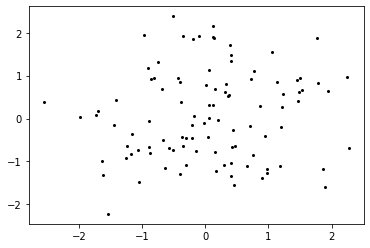

In [6]:
np.random.seed(0)

x = np.random.randn(100)
y = np.random.randn(100)

plt.plot(x, y, "ko", ms=2)

- randn()

    - n은 normal distribution
    - 표준 정규분포
    - 평균과 표준편차가 0, 1

- plt.plot()
    - 스캐터 플롯 그리기
    - "ko"
        - k: 검은색
        - o: 동그라미
    - ms: 마커 사이즈

- plot() 함수는 색, 패턴 등 지정하는 기능이 약함
- 그래서, scatter() 함수를 사용함

### plt.scatter()를 이용한 스캐터 플롯

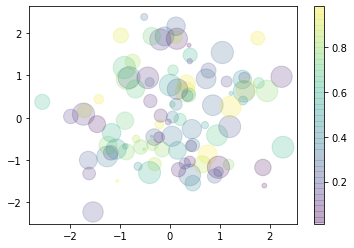

In [7]:
np.random.seed(0)

x = np.random.randn(100)
y = np.random.randn(100)
c = np.random.rand(100)
s = np.random.rand(100) * 500

plt.scatter(x, y, c=c, s=s, alpha=0.2, cmap='viridis')
plt.colorbar()

- plt.scatter()

    - 색, 크기, 알파값까지 지정 가능
    - 함수를 호출해서 컬러(c), 크기(s), 알파값(alpha), 투명도 지정
    - cmap: 컬러맵 지정
    - color의 강도를 이용해 온도, 고도 등을 표현할때 많이 사용함
    - 원의 크기를 통해 밀집도, 빈도 등을 표현함

### iris 데이터

- sepal의 length, width, 꽃 받침, 꽃잎 길이와 크기, 품종 등 데이터 분류 연습에 자주 활용되는 붓꽃 데이터

- 특징행렬, 출력, 레이블 등 머신러닝의 학습 데이터로 활용

In [13]:
from seaborn import load_dataset

In [9]:
iris = load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
import pandas as pd

In [15]:
iris["species_cat"] = pd.Categorical(iris.species)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    object  
 5   species_cat   150 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 6.2+ KB


- pandas의 Categorical()이라는 함수를 이용해서 column을 범주형 데이터로 변환 

- object ==> category

Text(0, 0.5, 'sepal_width')

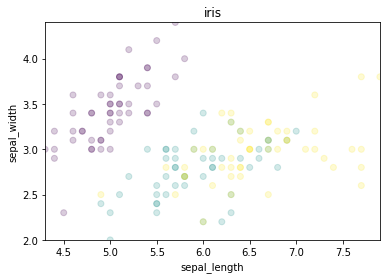

In [24]:
# 스캐터 플롯 그리기
plt.scatter(iris.sepal_length, iris.sepal_width, c=iris.species_cat.cat.codes, alpha=0.2, cmap="viridis")
plt.title("iris")
plt.xlim(iris.sepal_length.min(), iris.sepal_length.max())
plt.ylim(iris.sepal_width.min(), iris.sepal_width.max())
plt.xlabel(iris.columns[0])
plt.ylabel(iris.columns[1])

- iris.species_cat.cat.codes

    - scatter의 c에는 수치형 데이터가 와야함

    - iris.species는 문자열 이었음 그래서 c에 바로 사용할 수 없었다.
    - 그래서 카테고리형으로 변경함
    - 카테고리는 내부적으로 cat를 가짐
    - cat 안에는 codes라는 인코딩된 수치형 데이터가 있음

    - cat 객체는 수치형 데이터를 가지고 있어서 컬러(c) 지정이 가능함


- 품종을 컬러로 표현하여 경향에 대한 직관을 얻을 수 있음

In [25]:
species = iris.species.unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

- iris의 species.unique() 함수를 이용해 3가지 품종에 대한 고유값 얻기 가능

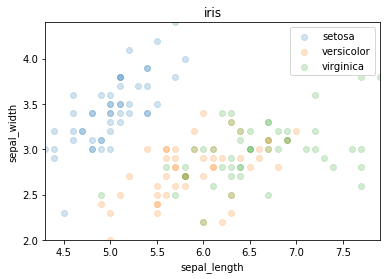

In [28]:
for sp in species:
    x = iris.loc[iris["species"] == sp, "sepal_length"]
    y = iris.loc[iris["species"] == sp, "sepal_width"]
    plt.scatter(x, y, label=sp, alpha=0.2)

plt.title("iris")
plt.xlim(iris.sepal_length.min(), iris.sepal_length.max())
plt.ylim(iris.sepal_width.min(), iris.sepal_width.max())
plt.xlabel(iris.columns[0])
plt.ylabel(iris.columns[1])
plt.legend()

- scatter()에 있는 label 정보를 legend() 함수를 통해 출력함

- 범례를 사용함에 차이점이 있음

<br/>

### 이어서...


3. matplotlib-3